In [1]:
#import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, k_means
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [5]:
df = pd.read_csv('/Users/jakirice/Desktop/dishes.csv')
df

,food item,calories,carbohydrates,proteins,total fat
0,Aloo-Baigan,103,32,1,5.0
1,Aloo Curry,105,15,1,5.0
2,Bhindi (Okra0,161,12,4,11.0
3,Cabbage,131,7,2,5.0
4,Chole,74,3,4,4.0
5,Besan Khasi,100,15,3,5.0
6,Mutter Paneer,147,11,9,8.0
7,Pumpkin,67,7,2,4.0
8,Koffa Curry,147,13,3,9.0
9,Chana Dahi,99,13,5,3.0


In [6]:
df.describe()

,calories,carbohydrates,proteins,total fat
count,17.000000,17.000000,17.000000,17.000000
mean,142.000000,13.117647,6.764706,7.482353
std,102.561567,9.259336,7.013642,7.251227
min,5.000000,3.000000,1.000000,0.200000
25%,99.000000,6.000000,2.000000,4.000000
50%,111.000000,12.000000,4.000000,5.000000
75%,147.000000,15.000000,9.000000,8.000000
max,421.000000,32.000000,24.000000,26.000000


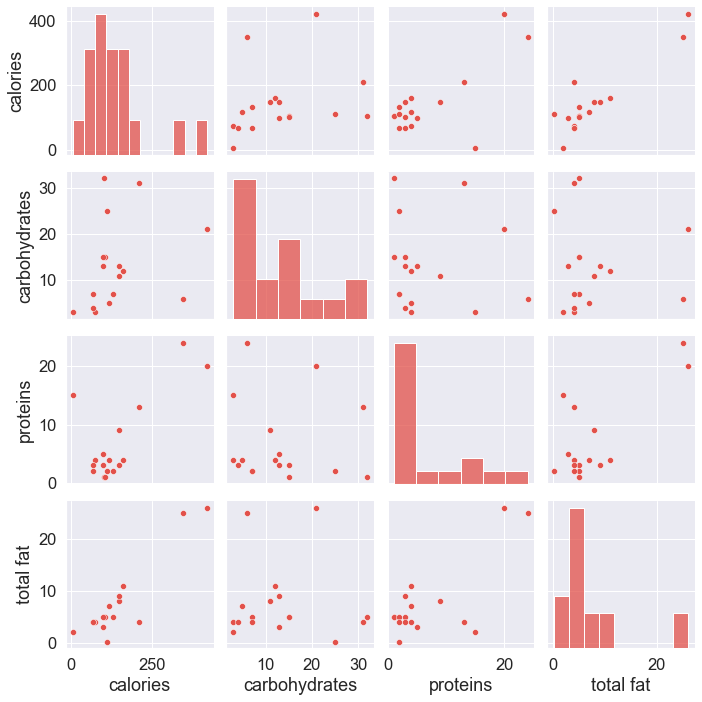

In [7]:
sns.pairplot(df[['calories','carbohydrates','proteins','total fat']])

In [8]:
df.isnull().sum() #check if there are null values
df.drop_duplicates(inplace=True) #remove duplicates in case there are

In [9]:
x = df.iloc[:, [1, 4]].values #columns 1 & 4

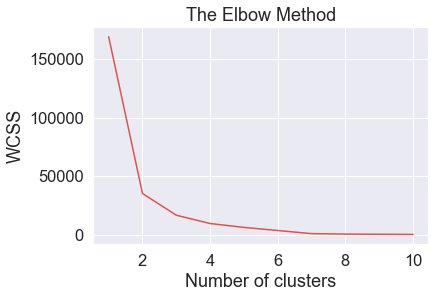

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [32]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [33]:
kmeans.cluster_centers_

array([[109.66666667,   5.08      ],
       [384.5       ,  25.5       ]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


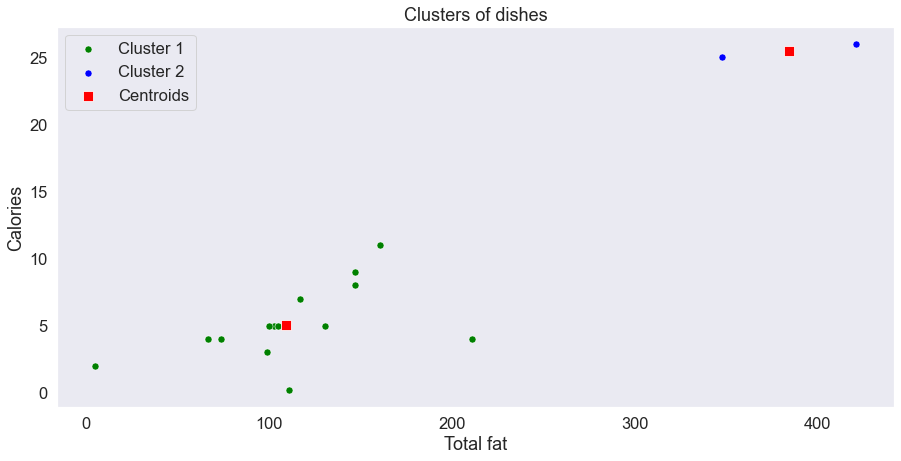

In [34]:
plt.figure(figsize=(15,7))
sns.scatterplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], color = 'green', label = 'Cluster 1',s=50)
sns.scatterplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',
label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('Clusters of dishes')
plt.xlabel('Total fat')
plt.ylabel('Calories')
plt.legend()
plt.show()

In [35]:
df['Clusters']=kmeans.labels_

In [36]:
df

,food item,calories,carbohydrates,proteins,total fat,Clusters
0,Aloo-Baigan,103,32,1,5.0,0
1,Aloo Curry,105,15,1,5.0,0
2,Bhindi (Okra0,161,12,4,11.0,0
3,Cabbage,131,7,2,5.0,0
4,Chole,74,3,4,4.0,0
5,Besan Khasi,100,15,3,5.0,0
6,Mutter Paneer,147,11,9,8.0,0
7,Pumpkin,67,7,2,4.0,0
8,Koffa Curry,147,13,3,9.0,0
9,Chana Dahi,99,13,5,3.0,0


In [37]:
df['Clusters'].value_counts()

0    15
1     2
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='total fat', ylabel='calories'>

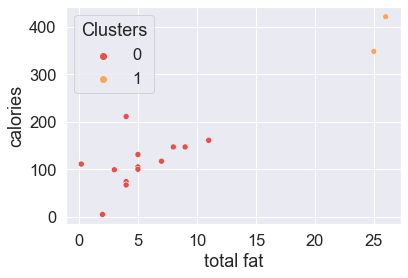

In [38]:
sns.scatterplot(x='total fat',y='calories',hue='Clusters',data=df)

In [39]:
df.groupby(['Clusters']).mean()

,calories,carbohydrates,proteins,total fat
Clusters,,,,
0,109.666667,13.066667,4.733333,5.08
1,384.500000,13.500000,22.000000,25.50
